# Anticipez les besoins en consommation électrique de bâtiments de la ville de Seattle

Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, Ce projet s’intéresse de près aux émissions des bâtiments non destinés à l’habitation de la ville de Seattle.  
Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.  
Nous cherchons également à évaluer l’intérêt de l’ENERGY STAR Score pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement.  

Dans cette première partie, nous allons réaliser une courte analyse exploratoire et nous allons nettoyer au fure et à mesure, les données si besoin. L'objectif sera de déterminer les variables pertinentes (variables target) ou d'en créer de nouvelles à partir de celles existantes (feature engineering).



## Sommaire:  
* [1.Analyse exploratoire](#1.)  
  * [1.1. Chargement et exploration des données](#1.1.)
  * [1.2. Etudes de ressemblance entre variables](#1.2.) 
  * [1.3. Feature engineering](#1.3.)  

## 1. Analyse exploratoire <a class="anchor" id="1."></a>  

### 1.1. Chargement et exploration des données <a class="anchor" id="1.1."></a>  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import my_module

#### a) Exploration des données collectées en 2015

In [2]:
df_2015 = pd.read_csv ('2015-building-energy-benchmarking.csv')
df_2015.shape

(3340, 47)

In [3]:
pd.set_option('isplay.max_columns', 47)
df_2015.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
my_module.variable_survey(df_2015)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3340,0.0 %
1,DataYear,int64,1,0.0 %
2,BuildingType,object,7,0.0 %
3,PrimaryPropertyType,object,27,0.0 %
4,PropertyName,object,3287,0.0 %
5,TaxParcelIdentificationNumber,object,3245,0.06 %
6,Location,object,3298,0.0 %
7,CouncilDistrictCode,int64,7,0.0 %
8,Neighborhood,object,13,0.0 %
9,YearBuilt,int64,113,0.0 %


<AxesSubplot:>

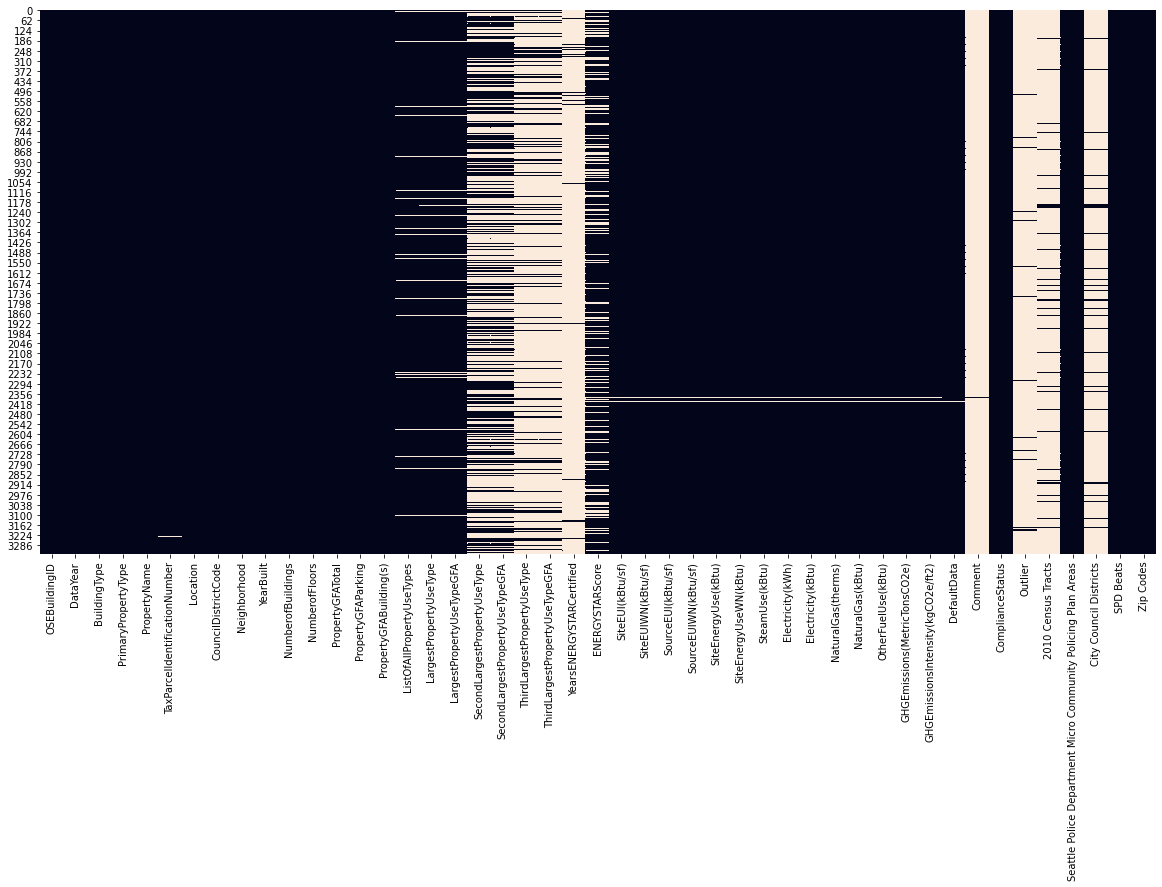

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2015.isna(),cbar=False)

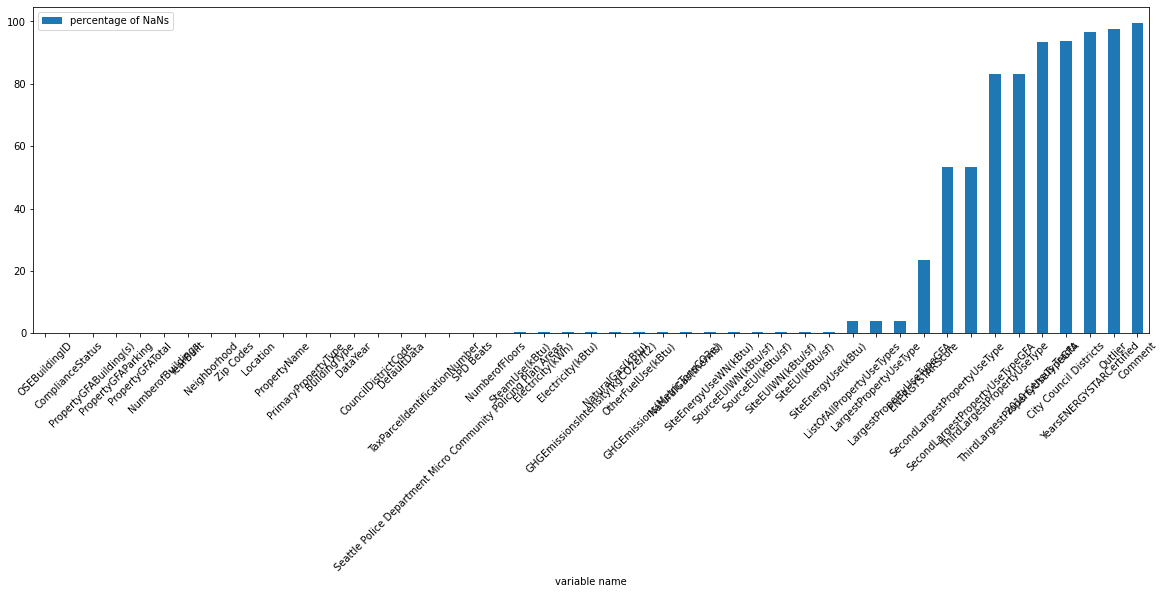

In [6]:
my_module.nans_df(df_2015)

#### b) Exploration des données collectées en 2016

In [7]:
df_2016=pd.read_csv('2016-building-energy-benchmarking.csv')
df_2016.shape

(3376, 46)

In [8]:
pd.set_option('isplay.max_columns', 46)
df_2016.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [9]:
my_module.variable_survey(df_2016)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3376,0.0 %
1,DataYear,int64,1,0.0 %
2,BuildingType,object,8,0.0 %
3,PrimaryPropertyType,object,24,0.0 %
4,PropertyName,object,3362,0.0 %
5,Address,object,3354,0.0 %
6,City,object,1,0.0 %
7,State,object,1,0.0 %
8,ZipCode,float64,55,0.47 %
9,TaxParcelIdentificationNumber,object,3268,0.0 %


<AxesSubplot:>

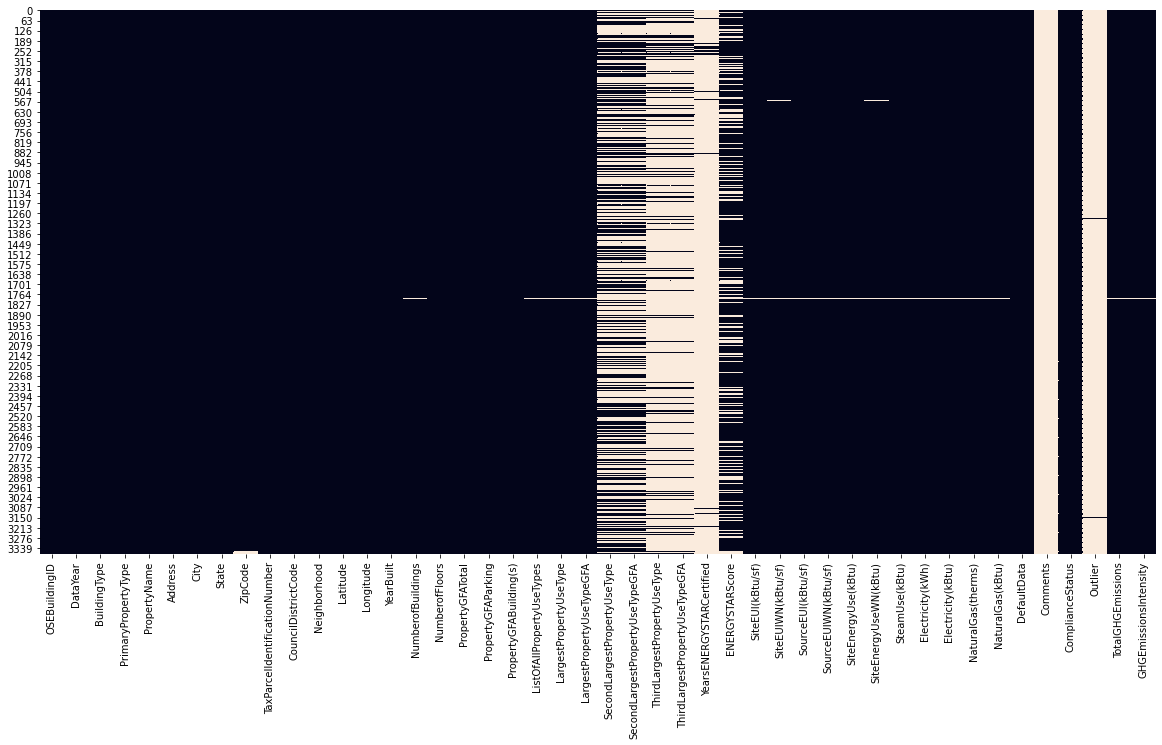

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2016.isna(),cbar=False)

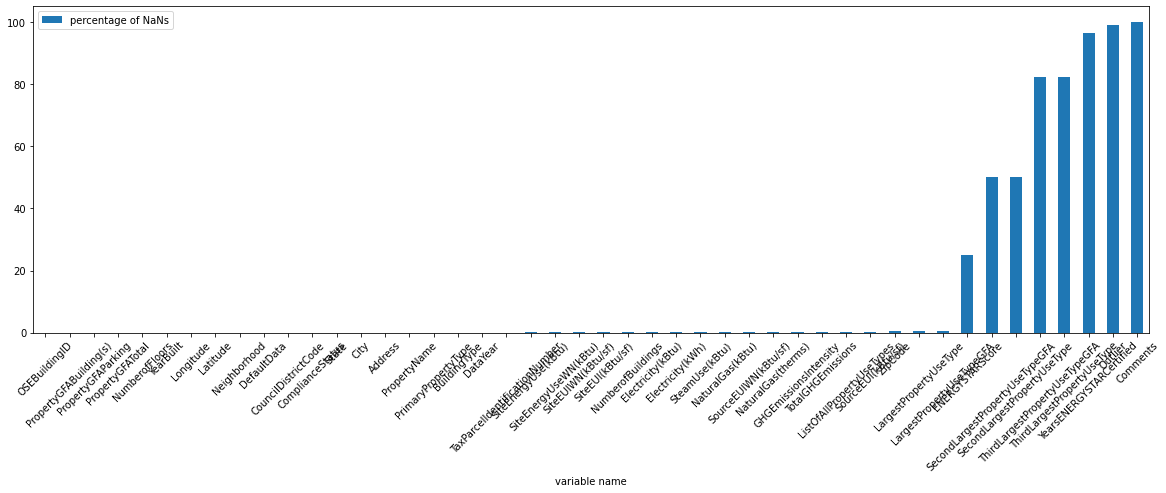

In [11]:
my_module.nans_df(df_2016)

In [12]:
dataset_dict={"df_2016":df_2016, "df_2015":df_2015}
my_module.dataframe_survey(dataset_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,df_2016,"(3376,46)",19952,12.85 %,0,0.0 %
1,df_2015,"(3340,47)",26512,16.89 %,0,0.0 %


   ### Remarques   
   - Nous remarquons que les datasets ne contiennent pas beaucoup de données manquantes (13% pour df_2016 et 17% pour df_2015)  
   - Ya pas de lignes redandantes pour les deux df.  
   - Nous remarquons qu'il y a des colonnes communes entre les deux df et d'autres qui sont spécifiques pour chaque df. Dans la suite, nous allons faire une analyse de l'intersection des colonnes entre les deux datasets. Le but c'est d'étudier la possibilité de concaténer les deux datasets. 

### 1.2. Etudes de ressemblance entre variables <a class="anchor" id="1.2."></a>  

In [13]:
#trouver les colonnes communes entre les deux df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
commun_cols = list(set(col_2015) & set(col_2016))
len(commun_cols)

37

In [14]:
#trouver les colonnes qui sont présents dans df_2015 et non présents dans df_2016
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2015

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [15]:
#trouver les colonnes qui sont présents dans df_2016 et non présents dans df_2015
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
extra_cols_2016

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

### Remarques:  
-Nous remarquons qu'il y a des colonnes qui sont à prioris les mêmes mais leur noms est différents:  
  - couple 1: 'GHGEmissions(MetricTonsCO2e)'= 'TotalGHGEmissions'  
  - couple 2: 'GHGEmissionsIntensity(kgCO2e/ft2)'= 'GHGEmissionsIntensity'  
  - couple 3: 'Comment' = 'Comments'  
  - couple 4: 'Zip Codes' = 'ZipCode'  
 
 Vérifions, couple par couple, la discription statistique (en utilisant la fonction describe()) et les valeurs des variables.

#### Couple 1: 'GHGEmissions(MetricTonsCO2e)' / 'TotalGHGEmissions'

In [16]:
print(f"Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n",df_2015['GHGEmissions(MetricTonsCO2e)'].describe(),
     f"\n\nDescription de la variable TotalGHGEmissions 2016 : \n\n", df_2016['TotalGHGEmissions'].describe())

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64 

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64


**Conclusion:** Les deux variables semblent avoir la même échelle de valeurs. Nous allons donc just les renommer pour pouvoir après les merger. 

In [17]:
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'})

#### Couple 2: 'GHGEmissionsIntensity(kgCO2e/ft2)'= 'GHGEmissionsIntensity' 

In [18]:
print (f"Description de la variable 'GHGEmissionsIntensity(kgCO2e/ft2) 2015: '\n\n", df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),
      f"\n\nDescription de la variable 'GHGEmissionsIntensity 2016: '\n\n", df_2016['GHGEmissionsIntensity'].describe() )

Description de la variable 'GHGEmissionsIntensity(kgCO2e/ft2) 2015: '

 count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64 

Description de la variable 'GHGEmissionsIntensity 2016: '

 count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64


**Conclusion:** Les deux variables semblent avoir la même échelle de valeurs. Nous allons donc just les renommer pour pouvoir après les merger. 

In [19]:
df_2015 = df_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

#### Couple 3: 'Comment'= 'Comments' 

In [20]:
print (f"Description de la variable 'Comment 2015: '\n\n", df_2015['Comment'].describe(),
      f"\n\nDescription de la variable 'Comments 2016: '\n\n", df_2016['Comments'].describe() )

Description de la variable 'Comment 2015: '

 count                                                    13
unique                                                   13
top       Recent energy efficiency upgrades include repl...
freq                                                      1
Name: Comment, dtype: object 

Description de la variable 'Comments 2016: '

 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Comments, dtype: float64


#### Remarque:  
 - Nous remarquons que les deux variables n'ont pas le même type (object en 2015 - float en 2016).  
 - C'est inutile de convertir le type de l'un des variables ensuite de le renommer, puisque ces deux variables sont presque vides (selon variable_survey(): en 2015 -->  99,61% NaN , en 2016 --> 100% NaN)  
   --> nous décidons donc de les supprimer


In [21]:
df_2016= df_2016.drop(['Comments'], axis = 1)
df_2015=df_2015.drop(['Comment'], axis = 1)

#### Couple 4 : 'Zip Codes' = 'ZipCode' 

In [22]:
print (f"Description de la variable 'Zip Codes 2015: '\n\n", df_2015['Zip Codes'].describe(),
      f"\n\nDescription de la variable 'ZipCode 2016: '\n\n", df_2016['ZipCode'].describe() )

Description de la variable 'Zip Codes 2015: '

 count     3340.000000
mean     18786.680240
std        588.604192
min      17916.000000
25%      18379.000000
50%      18390.000000
75%      19576.000000
max      19584.000000
Name: Zip Codes, dtype: float64 

Description de la variable 'ZipCode 2016: '

 count     3360.000000
mean     98116.949107
std         18.615205
min      98006.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98272.000000
Name: ZipCode, dtype: float64


**Conclusion:** Les deux variables semblent avoir la même échelle de valeurs. Nous allons donc just les renommer pour pouvoir après les merger. 

In [23]:
df_2015 = df_2015.rename(columns={'Zip Codes':'ZipCode'})

Après avoir étudier la ressemblances des variables non communes entre df_2015 et df_2016, nous allons re-vérifier la liste des variables communes. 

In [24]:
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['Location', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats']

extra_cols_2016 : 

 ['Address', 'City', 'State', 'Latitude', 'Longitude']


## 1.3. Feature engineering <a class="anchor" id="1.3."></a>    
  
  Nous remarquons que les extra-variables dans df_2016 sont des informations qui concernent la localisation (Location en anglais). Vérifions ceci en affichant les valeurs de "Location" dans df_2015.

In [25]:
pd.set_option("max_colwidth", 1000)
df_2015['Location']

0         {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
1           {'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
2          {'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
3        {'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{"address": "620 STEWART ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
4           {'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{"address": "401 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}
                                                                                     ...                                                                             

#### Remarque :  
On remarque que les données de localisation pour le jeu de données de 2015 sont "compactées" dans une sorte de double dictionnaire. Nous allons donc travailler cette variable pour extraire chacune des variables imbriquées (feature engineering)

In [26]:
import json

s= {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
print(s)
new_s={}
for key, value in s.items():
    if type(json.loads(value)) == dict:
        parsed_value=json.loads(value)
        for k, v in parsed_value.items():
            new_s[k]=v
    else:
        new_s[key]=value
new_s

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}


{'latitude': '47.61219025',
 'longitude': '-122.33799744',
 'address': '405 OLIVE WAY',
 'city': 'SEATTLE',
 'state': 'WA',
 'zip': '98101'}

In [27]:
#dataa=df_2015
#new_s={}
#dataa['Location']=dataa['Location'].to_dict()
#for key, value in dataa['Location'].items():
#    if type(json.loads(value)) == dict:
#        parsed_value=json.loads(value)
#        for k, v in parsed_value.items():
#            new_s[k]=v
#    else:
#        new_s[key]=value
#dataa['Location']=new_s
#dataa['Location']

In [28]:
#applatir 'Location' et créer d'autre colonnes contenant les variables imbriquées
import ast
df_2015['Location'] = [ast.literal_eval(str(item)) for index, item in df_2015.Location.iteritems()]
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015['Location'].apply(pd.Series)], axis=1)
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,latitude,longitude,human_address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,...,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,...,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,"{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,...,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,"{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,...,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,"{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,...,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,"{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}"


In [29]:
#applatir la variable 'human_address'
df_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in df_2015.human_address.iteritems()]
df_2015['human_address'].apply(pd.Series)

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...
3335,321 10TH AVE S,SEATTLE,WA,98104
3336,4123 12TH AVE NE,SEATTLE,WA,98105
3337,2030 8TH AVE,SEATTLE,WA,98121
3338,3801 NE 77TH ST,SEATTLE,WA,98115


In [30]:
#ajouter de nouvelles colonnes contenant les variables décompactées
df_2015 = pd.concat([df_2015.drop(['human_address'], axis=1), df_2015['human_address'].apply(pd.Series)], axis=1)
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,...,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,...,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,...,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,...,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,...,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [31]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'latitude', 'longitude', 'address', 'city', 'state', 'zip']

extra_cols_2016 : 

 ['Address', 'City', 'State', 'Latitude', 'Longitude']


Nous allons maintenant renommer les variables qui étaient imbriquées

In [32]:
df_2015 = df_2015.rename(columns={'address':'Address',
                                 'city':'City',
                                 'state':'State',
                                 'latitude':'Latitude',
                                 'longitude':'Longitude'})

In [33]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'zip']

extra_cols_2016 : 

 []


In [35]:
my_module.variable_survey(df_2015)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3340,0.0 %
1,DataYear,int64,1,0.0 %
2,BuildingType,object,7,0.0 %
3,PrimaryPropertyType,object,27,0.0 %
4,PropertyName,object,3287,0.0 %
5,TaxParcelIdentificationNumber,object,3245,0.06 %
6,CouncilDistrictCode,int64,7,0.0 %
7,Neighborhood,object,13,0.0 %
8,YearBuilt,int64,113,0.0 %
9,NumberofBuildings,int64,10,0.0 %


In [40]:
print(f'description de zip\n\n',df_2015['zip'].describe())
print(f'\n\ndescription de ZipCode\n\n',df_2015['ZipCode'].describe())

description de zip

 count      3340
unique       28
top       98109
freq        300
Name: zip, dtype: object


description de ZipCode

 count     3340.000000
mean     18786.680240
std        588.604192
min      17916.000000
25%      18379.000000
50%      18390.000000
75%      19576.000000
max      19584.000000
Name: ZipCode, dtype: float64


In [42]:
my_module.variable_survey(df_2015[['zip','ZipCode']])

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,zip,object,28,0.0 %
1,ZipCode,int64,29,0.0 %
